In [1]:
pip install nba_api

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.cbook import get_sample_data
from nba_api.stats.static import players
from nba_api.stats.endpoints import playergamelog, playercareerstats
from datetime import datetime
import pandas as pd

In [3]:
#Custom styling
font1 = {'family':'serif','color':'blue','size':20, 'weight': 'bold'}
title_font = {'family': 'serif', 'color': 'darkred', 'size': 30, 'weight': 'bold'}
label_font = {'family': 'serif', 'color': 'darkred', 'size': 15}
bg_color = '#1d4286'
grid_color = '#cccccc'
label_color= '#333333'
data_color= '#4F81BD'
text_color='#F5F5F5'
title_color = '#105ba7'
yellow='#e5a102'

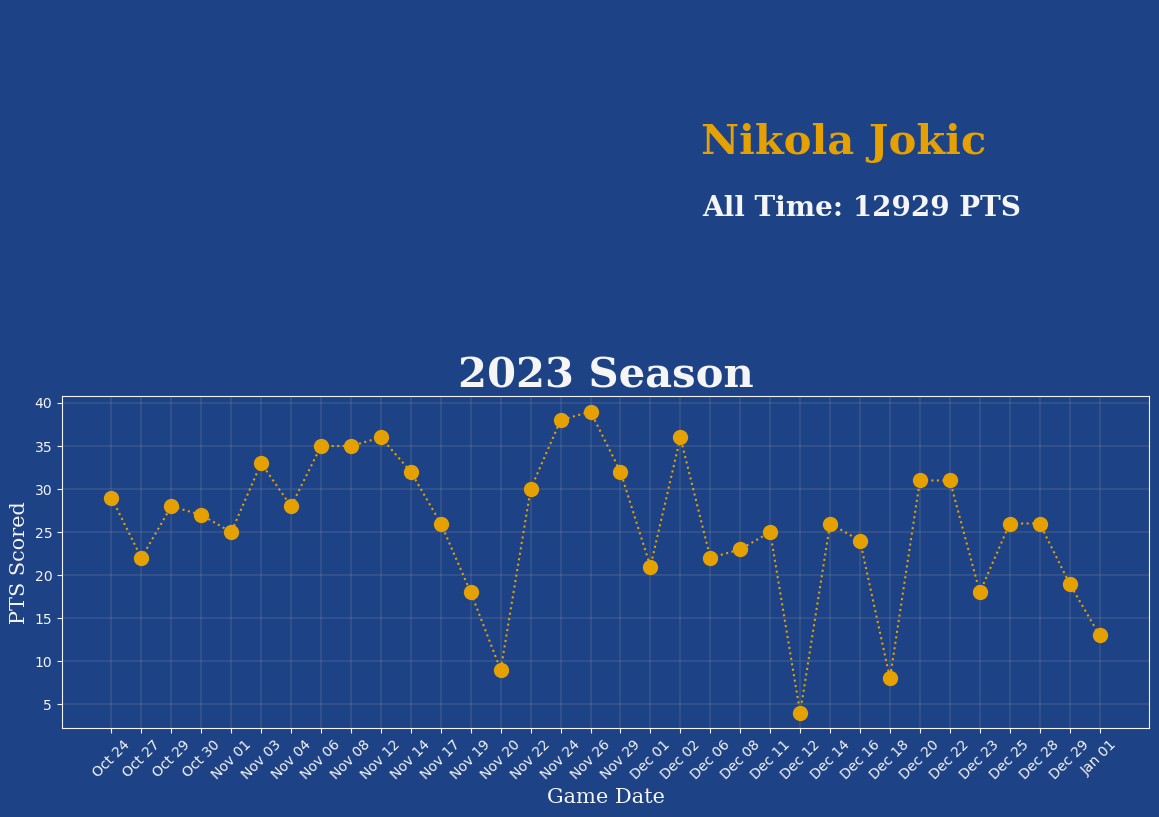

In [74]:
#Get Player data
player_name = "Nikola Jokic"
player = players.find_players_by_full_name(player_name)[0]
player_id = player['id']

#Game Data
gamelog = playergamelog.PlayerGameLog(player_id=player_id, season='2023')
gamelog_data = gamelog.get_data_frames()[0]
game_dates = gamelog_data['GAME_DATE']
dayMonth = [date.strftime("%b %d") for date in pd.to_datetime(game_dates)]
points_scored = gamelog_data['PTS']

#All time Pts
career_stats = playercareerstats.PlayerCareerStats(player_id=player_id)
career_data = career_stats.get_data_frames()[0]
points = career_data['PTS']
sumPTS = sum(points)

#Add Player Img
jokic_img = mpimg.imread('jokic.jpg') 


#Create grids and fig
fig = plt.figure(figsize=(11.69, 8.27))
fig.patch.set_facecolor(bg_color)
ax1 = plt.subplot2grid((2, 2), (1, 0), colspan=2)
ax2 = plt.subplot2grid((2, 2), (0, 0), colspan=2)

#Games plot
ax1.plot(dayMonth, points_scored, marker='o', ms=10, ls=":", c=yellow)
ax1.set_title(f"2023 Season", fontdict =title_font, color=text_color)
ax1.set_xlabel("Game Date", fontdict =label_font, color=text_color)
ax1.set_ylabel("PTS Scored", fontdict =label_font, color=text_color)
ax1.tick_params(axis="x", colors=text_color, rotation=45)
ax1.tick_params(axis='y', colors=text_color)
ax1.grid(linewidth=0.2)
ax1.set_facecolor(bg_color)
ax1.invert_xaxis()

#All time pts display
ax2.axis("off")
ax2.text(0.882, 0.6, f"All Time: {sumPTS} PTS", ha='right', va='center', fontdict=font1, color=text_color)
ax2.text(0.85, 0.4, f"{player_name}", ha='right', va='center', fontdict =title_font, color=yellow)


#Set the color for the grid outlines
for spine in ax1.spines.values():
    spine.set_color(text_color)

plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()